In [31]:

import numpy as np

import math

import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import norm


import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style('ticks')
sns.set_context("talk", rc={"lines.linewidth": 2})


au=1.5e11
msun=2e30
mearth=5.97e24
grav=6.67e-11
tyear=3.15551e+07

from astropy.io import ascii

import re

In [32]:

dirlist=['cat_only_mtot_100_dmax_30km_fv_0.04/', 'mtot_100_dmax_30km_fv_0.04/', 'h_1cm/mtot_100_dmax_30km_fv_0.04/']



vol=[1,1, 1]

h=[10,10, 10]

dirsave='/Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/'


dir1=dirlist
for j in range(0,np.size(dirlist)):    
    dir1[j]=dirsave + dirlist[j]

label=['$h=10$cm: CC', '$h=10$cm: RC + CC', '$h=1$cm: RC + CC']
   
color_list=['k',  '#ff7f00','r',  'b','y', 'c', 'm', 'tab:blue', 'tab:orange']    



color_list = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']



linestyle_list=[":", 'dashed', 'dashdot', 'solid']

       

In [33]:
def get_gas(file):
    dat = ascii.read(dir1[j]+ 'gas.dat')
    gas=dat[1][:]
    return (gas)

def get_delta_gas(gas):
    delta_gas=np.zeros(np.size(gas))
    for i in range(0,np.size(gas)-1):
        delta_gas[i]=gas[i+1]-gas[i]
        if delta_gas[i]<1e-3:
            delta_gas[i]=delta_gas[i-1]
    return(delta_gas)
def get_mdot(file):
    dat1 = ascii.read(file)
    mdot=dat1[1][:]
    return(mdot)

def get_mdot_new(file):
    dat1 = ascii.read(file)
    timestep=dat1[1][:]
    mdot=dat1[2][:]
    return(mdot, timestep)

def get_gas_new(file):
    dat = ascii.read(dir1[j]+ 'gas.dat')
    timestep=dat[1][:]
    gas=dat[2][:]
    return (gas, timestep)
def get_delta_gas_new(gas, timestep):
    delta_gas=np.zeros(np.size(gas))
    for i in range(0,np.size(gas)-1):
        delta_gas[i]=(gas[i+1]-gas[i])/(timestep[i+1]-timestep[i])
    return(delta_gas)

 # nb this is the total mass released to solids - not the rate!



In [34]:
def get_mass (itime_max_float, file, vol):

        
        f = open(file, "r")

        if (vol==0):
            f.readline() # first line of constants
            f.readline() # gas

            f.readline() # mdot
            f.readline() # mdot
        if (vol==1):
            f.readline()
        if (vol==3):
            f.readline()# gas constants
            f.readline()
            f.readline()# gas
            f.readline()# mdot

        
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
            
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            mass=f.readline() # line with mass
            
            
            mass_all=re.split(r'\t+', mass.rstrip('\t'))
            if (vol==0):
                f.readline() #  Gas 
                f.readline() # Mdot
            #print(mass)
            if (vol==3):
                f.readline() #  Gas 
                f.readline() # Mdot
    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
         

In [35]:
def get_inparam(file):    
    f = open(file, "r")
    f.readline() #restart
    f.readline() #calchi
    f.readline() #solid
    f.readline() #track origin
   

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta_t=float(delta_t_all[1])

    line_split=f.readline() #rin
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rin=float(delta_t_all[1])

   
    line_split=f.readline() #rout

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    rout=float(delta_t_all[1])

    rbelt=(rin+ rout)/2.
    
    line_split=f.readline() #imax

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    imax=float(delta_t_all[1])
   

    line_split=f.readline() #ecc

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    ecc=float(delta_t_all[1])
    line_split=f.readline() #vrel

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))
    vrel=float(delta_t_all[1])

    
     # delta

    line_split=f.readline()  # 
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    delta=float(delta_t_all[1])
  

    line_split=f.readline()  # alpha
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    alpha_p=float(delta_t_all[1])


    alpha=(2+alpha_p)/3

        
    line_split=f.readline() # mtot0
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    mtot0=float(delta_t_all[1])

    line_split=f.readline()  # rho_s
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_s=float(delta_t_all[1])

    line_split=f.readline()  # rho_v
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    rho_v=float(delta_t_all[1])

   
    line_split=f.readline() # dmax
    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dmax=float(delta_t_all[1])



    line_split=f.readline() # dbl
    

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    dbl=float(delta_t_all[1])

    f.readline() # ntime

    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    outputinterval=float(delta_t_all[1])


    f.readline() # agrain


    line_split=f.readline() 

    delta_t_all=re.split(r'\t+', line_split.rstrip('\t'))

    fv0=float(delta_t_all[1])


    f.readline() # 
    

    f.close()
    
    diam_scrap=dmax
    i=0
    while(diam_scrap > dbl) :
           diam_scrap=(1-delta)**(1./3.)*diam_scrap 
           i=i+1 

    nbin=i-1


    mass_i=np.zeros(nbin)
    diam_i=np.zeros(nbin)


    diam_i[0]=dmax
    mass_i[0]=rho_s*diam_i[0]**3./6.
    for i in range(1, nbin-1):
        mass_i[i]=mass_i[i-1]*(1-delta)
    diam_i=(mass_i*6./rho_s)**(1./3.)
    return(delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0)

In [36]:
def get_rate (itime_max_float, file):

         #finds the rate as a function of diamter/mass at a particular epoch - given by itime_max_float
        # the file should be /rate_r.dat or /rate_c.dat 

        f = open(file, "r")

        f.readline()


         #print(itime_max_float, it)
        timestep=0
        while (timestep <  itime_max_float):
        # timestep line
              #print(timestep,itime_max_float)
            line_split=f.readline()
            
            timestep_all=re.split(r' ', line_split.rstrip('  '))
            if (np.size(timestep_all)!=3):
                print('oops not 3 dims in timestep', timestep_all, timestep, itime_max_float)
            timestep=float(timestep_all[2])
            
            
            mass=f.readline() # line with mass
            

            mass_all=re.split(r'\t+', mass.rstrip('\t'))

    
        line_split=f.readline() 
    
        

        timestep_all=re.split(r' ', line_split.rstrip('  '))
        timestep=float(timestep_all[2])
        
        mass=f.readline() # line with mass
        mass_all_1=re.split(r'\t+', mass.rstrip('\t'))
        

        f.close()

        return(mass_all_1)
        




0 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/cat_only_mtot_100_dmax_30km_fv_0.04/
1 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
2 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/h_1cm/mtot_100_dmax_30km_fv_0.04/


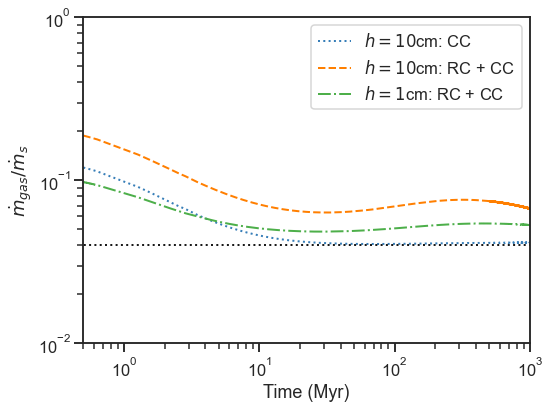

In [39]:
fig, ax = plt.subplots(figsize=(8, 6))


for j in range(0,np.size(dir1)):
    print(j, dir1[j])
    file=dir1[j]+ 'mdot.dat'

    mdot, timestep=get_mdot_new(file)
    file=dir1[j]+'gas.dat'
    if vol[j] ==1:
            gas, timestep_g=get_gas_new(file)
            delta_gas=get_delta_gas_new(gas, timestep)

    file= dir1[j]+ "inparam.in"
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0 = get_inparam(file)
   
    
    time_i=np.arange(0,np.size(mdot)-1)

    if vol[j] == 1:
            # deleting the mdot gas over the transistion, which are not valid as the timestep changes from 1 to outputinterval..
        s=2000    
        transition=np.arange(s,10000+1)
        transition=np.delete(transition, [4000-s,5000-s,6000-s,7000-s,8000-s,9000-s])
        delta_gas = np.delete(delta_gas, (transition), axis=0)
        timestep_g=np.delete(timestep_g, transition, axis=0)
        mdot=np.delete(mdot, transition, axis=0)
        plt.plot( delta_t*timestep_g[1:np.size(mdot)-5]/(tyear*1e6), (delta_gas[1:np.size(mdot)-5])/abs(mdot[1:np.size(mdot)-5]), label=label[j], color=color_list[j], linestyle=linestyle_list[j])

   
ax.set_xscale('log')
ax.set_yscale('log')


plt.xlabel('Time (Myr)')
plt.ylabel('$\dot m_{gas}/\dot m_s$')

plt.plot([0.000001,1e8], [0.04,0.04], linestyle=':', color='k')

ax.legend(loc='upper right')

ax.set_ylim((0.01,1))

ax.set_xlim((0.5,1e3))


plt.savefig(dirsave+"mdotgas_mdot_19aug_resurf_cat.pdf")

    #######################################

    
    
    


0 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/cat_only_mtot_100_dmax_30km_fv_0.04/
1 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/mtot_100_dmax_30km_fv_0.04/
2 /Users/amy/Documents/backup_datadir/projects/collevol/collevol_2019/volatile_loss/14Aug/h_1cm/mtot_100_dmax_30km_fv_0.04/
i am here


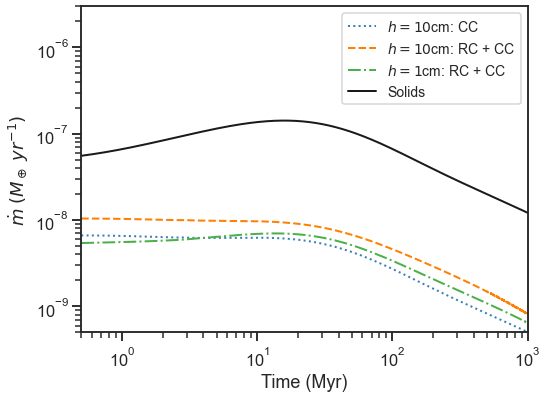

In [40]:
fig, ax = plt.subplots(figsize=(8, 6))


for j in range(0,np.size(dir1)):
    print(j, dir1[j])
    

    file=dir1[j]+'mdot.dat'
    mdot, timestep=get_mdot_new(file)
    file=dir1[j]+'gas.dat'
    gas, timestep_g=get_gas_new(file)
    delta_gas=get_delta_gas_new(gas, timestep)


    
    file= dir1[j]+ "inparam.in"
    
    
    delta_t, outputinterval, dmax, dbl, delta, diam_i, nbin, vrel, rho_s, mtot0, rbelt, alpha, ecc,fv0=get_inparam(file)

    rho=rho_s
    # deleting the mdot gas over the transistion, which are not valid as the timestep changes from 1 to outputinterval..
    s=4000    
    transition=np.arange(4000,10000+1)
    transition=np.delete(transition, [4000-s,5000-s,6000-s,7000-s,8000-s,9000-s])
    delta_gas = np.delete(delta_gas, (transition), axis=0)
    timestep_g=np.delete(timestep_g, transition, axis=0)

    plt.plot( delta_t*timestep_g/(tyear*1e6), (tyear/mearth)*delta_gas/(delta_t), label=label[j], color=color_list[j], linestyle=linestyle_list[j])

plt.plot( delta_t*timestep/(tyear*1e6), (tyear/mearth)*abs(mdot)/(delta_t), color='k', label='Solids')



    
    
        
ax.set_xscale('log')
ax.set_yscale('log')


plt.xlabel('Time (Myr)')
plt.ylabel('$\dot m \; (M_\oplus \; yr^{-1})$')



ax.legend(loc='upper right',prop={"size":14})


ax.set_ylim((5e-10,3e-6))
ax.set_xlim((0.5,1e3))



print('i am here')
plt.savefig(dirsave+"gas_time_19aug_resurf_cat.pdf")

    #######################################



   #######################################

